**Step 1 (Manual)**

Get the list of genes that express plasma membrane proteins from flybase.

>flybase.org > Tools > Search/Browse Portals > QueryBuilder > Build a new query > Choose Expression Patterns in Data Class > Type membrane in Subcellular Localization > Click Finish Editing > Click Run Query > Click on gene(count) > Export ID list




**Step 2 (Manual)**

Use [DIOPT](https://www.flyrnai.org/cgi-bin/DRSC_orthologs.pl) to get the orthologs for each of the genes found in step 1. It'll take a couple minutes for DIOPT to finish processing, and there's no need to convert flybase ids to gene names as DIOPT can deal with them.

**Step 3: Clean DIOPT Data**

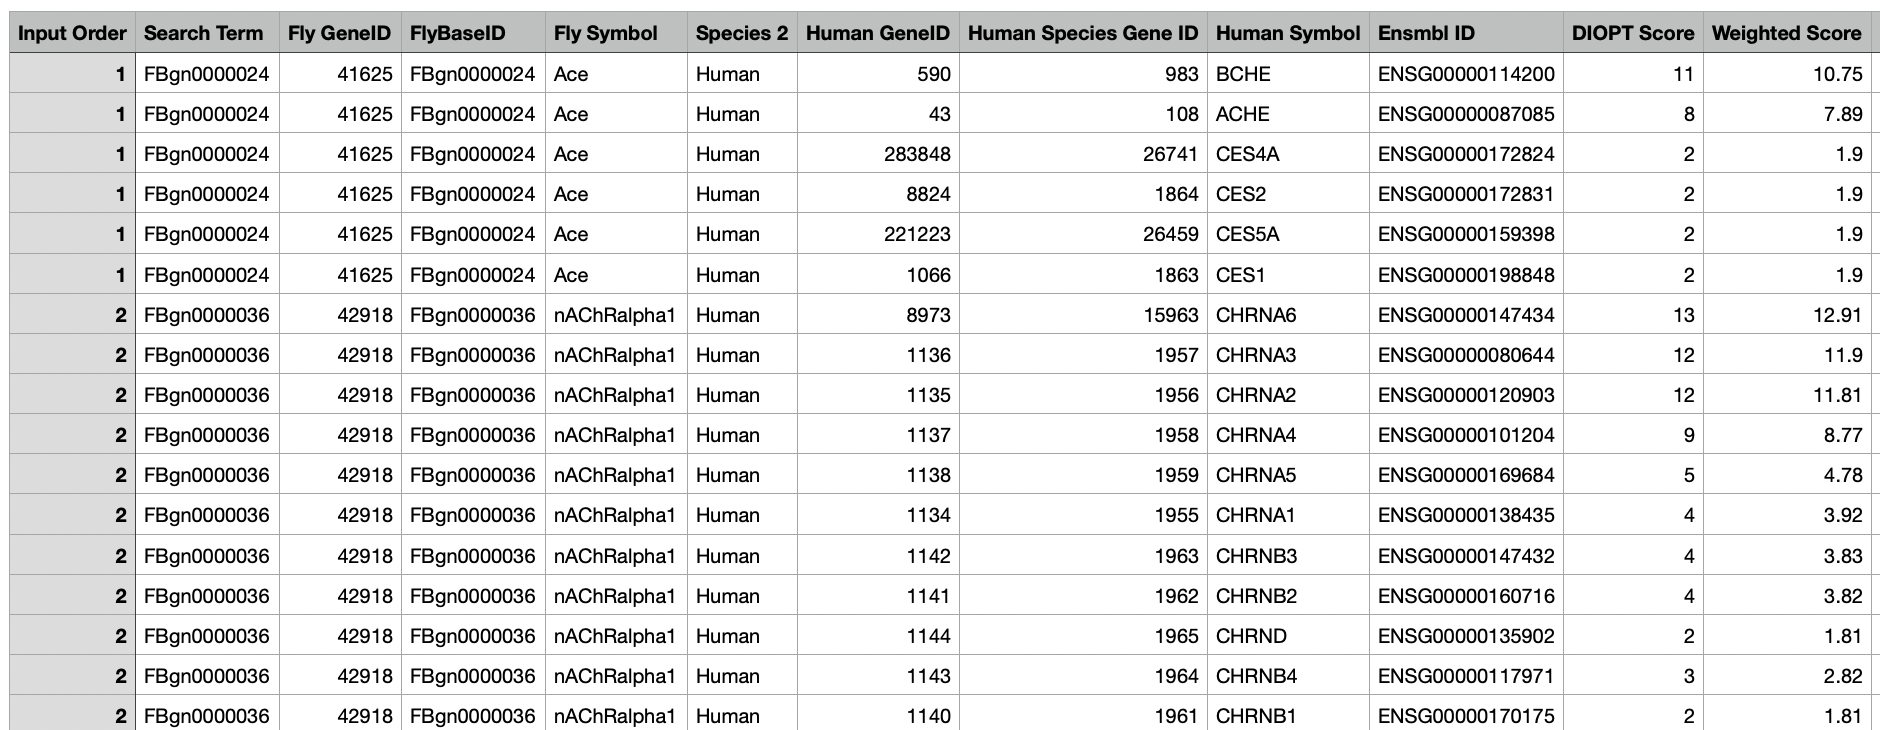

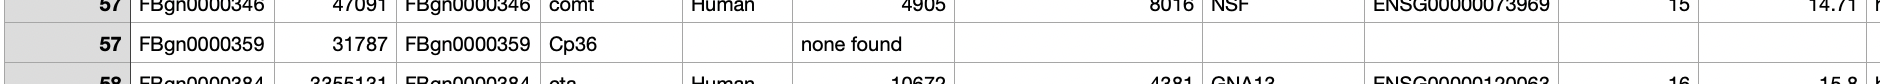

There are two problems with it:

*   Each gene has multiple orthologs. We'll need to discard some or squash all of them into one column
*   The genes that have no orthologs are listed. We need to get rid of them.

One good thing, however, is that they included the gene names.



First we'll need to upload our files to google drive and mount it so that colab can access them.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now comes the data wrangling part. We'll loop through the rows one by one, if it has an orthologs add it to it's list of orthologs(which is empty at first). If the row has none found then we'll discard that gene.

Let's read the file first:

In [ ]:
import csv

In [ ]:
with open("/content/drive/MyDrive/BrainVIP/Fall 2021 VIP-CURE/Raw Data Backup/colab/diopt_results_2021-09-30 075001.csv") as f:
  reader = csv.reader(f)
  r = 0
  for row in reader:
    r = r + 1
    print(row)
    if r > 5:
      break


FileNotFoundError: ignored

As the output shows the rows are just arrays, with the [1] => geneid,  [4] => gene name, and [8] => human ortholog name. Now we'll store these values.

In [ ]:
orthologs = {}
gene_name = {}

In [ ]:
with open("/content/drive/MyDrive/BrainVIP/Fall 2021 VIP-CURE/Raw Data Backup/colab/diopt_results_2021-09-30 075001.csv") as f:
  reader = csv.reader(f)
  r = 0
  for row in reader:
    r = r + 1
    if r == 1 or row[5] == "none found":
      continue
    gene_name[row[1]] = row[4]
    if row[1] not in orthologs:
      orthologs[row[1]] = []
    orthologs[row[1]].append(row[8])

Now for each flygene id(x) that has at least one orthologs, orthologs[x] will contain all its orthologs and gene_name[x] will be its gene name

In [ ]:
print(gene_name['FBgn0000024'])
print(orthologs['FBgn0000024'])

Ace
['BCHE', 'ACHE', 'CES4A', 'CES2', 'CES5A', 'CES1']


**Step 4**: Check if any of the human orthologs are expressed in the membrane as well

If none of the human orthologs are expressed in the membrane, then we should discard that gene.

Let's open up the human localization dataset first. The file format is txt, but it's actually a tsv in disguise.

In [ ]:
with open('/content/drive/MyDrive/BrainVIP/Fall 2021 VIP-CURE/Raw Data Backup/Localization Data/HPA_subcell_location_Plasma_2087.txt') as f:
  reader = csv.reader(f, delimiter='\t')
  r = 0
  for row in reader:
    r = r + 1
    print(row)
    if r > 5:
      break

['Gene', 'Gene synonym', 'Ensembl', 'Gene description', 'Uniprot', 'Chromosome', 'Position', 'Protein class', 'Biological process', 'Molecular function', 'Disease involvement', 'Evidence', 'HPA evidence', 'UniProt evidence', 'NeXtProt evidence', 'MS evidence', 'RNA tissue specificity', 'RNA tissue distribution', 'RNA tissue specificity score', 'RNA tissue specific NX', 'RNA single cell type specificity', 'RNA single cell type distribution', 'RNA single cell type specificity score', 'RNA single cell type specific NX', 'RNA cancer specificity', 'RNA cancer distribution', 'RNA cancer specificity score', 'RNA cancer specific FPKM', 'RNA brain regional specificity', 'RNA brain regional distribution', 'RNA brain regional specificity score', 'RNA brain regional specific NX', 'RNA blood cell specificity', 'RNA blood cell distribution', 'RNA blood cell specificity score', 'RNA blood cell specific NX', 'RNA blood lineage specificity', 'RNA blood lineage distribution', 'RNA blood lineage specific

We only need the first columns as all of these are expressed in the membranes.

In [ ]:
human_expressed = []

In [ ]:
with open('/content/drive/MyDrive/BrainVIP/Fall 2021 VIP-CURE/Raw Data Backup/Localization Data/HPA_subcell_location_Plasma_2087.txt') as f:
  reader = csv.reader(f, delimiter='\t')
  r = 0
  for row in reader:
    r = r + 1
    if r > 1:
      human_expressed.append(row[0])

In [ ]:
print(human_expressed[:])

['AADAT', 'AAK1', 'ABCA12', 'ABCA7', 'ABCB1', 'ABCB11', 'ABCB4', 'ABCB6', 'ABCC1', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCC6', 'ABCG2', 'ABHD3', 'ABI1', 'ABLIM3', 'AC004691.2', 'AC004922.1', 'AC005324.3', 'AC005726.1', 'AC008403.1', 'AC138696.1', 'ACIN1', 'ACKR3', 'ACLY', 'ACOT13', 'ACOT9', 'ACTN1', 'ACTR10', 'ACTR6', 'ADA', 'ADAM10', 'ADAM12', 'ADAM22', 'ADAM28', 'ADAM33', 'ADAMTS1', 'ADAMTS2', 'ADAMTSL4', 'ADAP1', 'ADCK5', 'ADD1', 'ADD2', 'ADGRB2', 'ADGRD1', 'ADGRG2', 'ADGRG7', 'ADGRL2', 'ADH1A', 'ADH1B', 'ADH1C', 'ADH7', 'ADK', 'ADORA1', 'ADRA1B', 'ADRM1', 'ADSS', 'AFAP1L2', 'AFDN', 'AFG1L', 'AGER', 'AGRN', 'AHNAK', 'AHNAK2', 'AIFM2', 'AKAP10', 'AKAP11', 'AKAP12', 'AKR1B10', 'AKR1B15', 'AL132780.3', 'AL139300.1', 'AL355315.1', 'AL358113.1', 'AL645922.1', 'ALDH3A1', 'ALK', 'ALOX15B', 'ALOXE3', 'ALPI', 'ALPP', 'ALPPL2', 'ALS2CR12', 'AMACR', 'AMDHD1', 'AMER1', 'AMER2', 'AMIGO2', 'AMOT', 'AMOTL1', 'AMOTL2', 'AMPH', 'ANK2', 'ANK3', 'ANKEF1', 'ANKFN1', 'ANKIB1', 'ANKLE2', 'ANKRA2', 'ANKRD13A', 'A

Now let's clean up the `orthologs` variable to contain only the human genes that are expressed in membrane. If the orthologs[x] is not empty then we'll keep that.

In [ ]:
flyXhumanXmembrane = []
for fly_gene in orthologs:
  orthologs[fly_gene] = [human_gene for human_gene in orthologs[fly_gene] if human_gene in human_expressed]
  if len(orthologs[fly_gene]) > 0:
    flyXhumanXmembrane.append(fly_gene)

In [ ]:
len(flyXhumanXmembrane)

1213

So we have got 1213 flygenes that have orthologs in humans, and the fly_gene and at least one of the ortholog genes are expressed in the membrane.

**Step 6**: Join the RNASeq data to see how these 1213 genes are expressed in the mushroom body(no idea what that means lol). 


In [ ]:
mb = {}
with open('/content/drive/MyDrive/BrainVIP/Fall 2021 VIP-CURE/Raw Data Backup/Cell Types Data/Cell_Types_Avg_Counts.csv') as f:
  reader = csv.reader(f)
  r = 0
  for row in reader:
    r = r + 1
    if r < 5:
      print(row)
    if r > 1:
      mb[row[0]] = [row[1], row[2], row[3], row[4]]

['\ufeffSymbol', 'MB-g avg', 'MB-ab avg', 'Non MB neuron Avg', 'Astro Avg']
['mamo', '13444.5', '749.5', '3839.5', '3658.25']
['blot', '43414.75', '48021.75', '52581', '5542.5']
['noe', '43396.5', '47997.75', '52528.25', '5538']


**Step 7**: Write the results to a csv file.

In [ ]:
with open('/content/drive/MyDrive/BrainVIP/Fall 2021 VIP-CURE/Raw Data Backup/colab/flyxhumanxmembranexrnaseq.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['Fly GeneID', 'Fly GeneName', 'Human Orthologs', 'MB-g avg', 'MB-ab avg', 'Non MB neuron Avg', 'Astro Avg'])
  r = 0
  for fly_gene in flyXhumanXmembrane:
    if gene_name[fly_gene] not in mb:
      writer.writerow([fly_gene, gene_name[fly_gene], ' '.join(orthologs[fly_gene]), 0, 0, 0, 0])
    else:
      writer.writerow([fly_gene, gene_name[fly_gene], ' '.join(orthologs[fly_gene])] + mb[gene_name[fly_gene]])